<a href="https://colab.research.google.com/github/pathaniaanuj/Data_Analysis/blob/main/worldmeter_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT LIBRARIES
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/worldometer_data.csv")
## analyizing the covid cases between jan 2020 to july 2020

In [ ]:
df.head(10) # show first 10 rows

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [ ]:
df.shape  # this dataset consists of 209 rows and 16 columns

(209, 16)

In [ ]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [ ]:
# there are some unwanted column which are not important in our prediciton
# delete that columns
df.drop(["NewCases","NewDeaths","NewRecovered"],axis=1,inplace=True)

In [ ]:
df.shape # now our data consists of 209 rows and 13 columns

(209, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [ ]:
#check for null values
df.isnull().sum()

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       4
ActiveCases          4
Serious,Critical    87
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
WHO Region          25
dtype: int64

In [ ]:

df[df.isnull().any(axis=1)] # there are a lot of null values

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
9,Spain,Europe,46756648.0,354530,28500.0,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
11,UK,Europe,67922029.0,308134,46413.0,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
14,Bangladesh,Asia,164851401.0,249651,3306.0,143824.0,102521.0,NaN,1514.0,20.0,1225124.0,7432.0,South-EastAsia
22,Indonesia,Asia,273808365.0,118753,5521.0,75645.0,37587.0,NaN,434.0,20.0,1633156.0,5965.0,South-EastAsia
29,Sweden,Europe,10105596.0,81967,5766.0,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992.0,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [ ]:
# replace these null values with zero
df=df.fillna(0)

In [ ]:
#check again for null values
df[df.isnull().any(axis=1)]

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region


In [ ]:
df.isnull().sum() # now there is no null values

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [ ]:
# we replace  null values of WHo region with 0 .. we have to change these value from "0" to 'none'
df[df["WHO Region"]==0]['WHO Region']

84     0
102    0
112    0
156    0
158    0
159    0
167    0
170    0
171    0
172    0
173    0
176    0
177    0
179    0
181    0
183    0
190    0
191    0
192    0
193    0
194    0
199    0
204    0
205    0
206    0
Name: WHO Region, dtype: object

In [ ]:
df["WHO Region"]=df['WHO Region'].replace(0,"None") # replace "0" to none

In [ ]:
df.tail(20)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
189,Belize,North America,398312.0,86,2.0,31.0,53.0,2.0,216.0,5.0,3679.0,9236.0,Americas
190,French Polynesia,Australia/Oceania,281072.0,64,0.0,62.0,2.0,0.0,228.0,0.0,5849.0,20810.0,None
191,St. Vincent Grenadines,North America,110976.0,56,0.0,46.0,10.0,0.0,505.0,0.0,2447.0,22050.0,None
192,Saint Martin,North America,38729.0,53,3.0,41.0,9.0,1.0,1368.0,77.0,1183.0,30546.0,None
193,Macao,Asia,650193.0,46,0.0,46.0,0.0,0.0,71.0,0.0,4071.0,6261.0,None
194,Curaçao,North America,164161.0,31,1.0,28.0,2.0,0.0,189.0,6.0,1080.0,6579.0,None
195,Fiji,Australia/Oceania,897095.0,27,1.0,18.0,8.0,0.0,30.0,1.0,6693.0,7461.0,WesternPacific
196,Saint Lucia,North America,183712.0,25,0.0,24.0,1.0,0.0,136.0,0.0,3895.0,21202.0,Americas
197,Timor-Leste,Asia,1320812.0,25,0.0,24.0,1.0,0.0,19.0,0.0,4238.0,3209.0,South-EastAsia
198,Grenada,North America,112576.0,24,0.0,23.0,1.0,0.0,213.0,0.0,6252.0,55536.0,Americas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         209 non-null    object 
 2   Population        209 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       209 non-null    float64
 5   TotalRecovered    209 non-null    float64
 6   ActiveCases       209 non-null    float64
 7   Serious,Critical  209 non-null    float64
 8   Tot Cases/1M pop  209 non-null    float64
 9   Deaths/1M pop     209 non-null    float64
 10  TotalTests        209 non-null    float64
 11  Tests/1M pop      209 non-null    float64
 12  WHO Region        209 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [ ]:
df["Continent"]=df['Continent'].replace(0,"None") # replace 0 to none

In [ ]:
df["Population"]=df["Population"].astype(int)
df["TotalDeaths"]=df["TotalDeaths"].astype(int)
df["TotalRecovered"]=df["TotalRecovered"].astype(int)
df["ActiveCases"]=df["ActiveCases"].astype(int)
df["Serious,Critical"]=df["Serious,Critical"].astype(int)
df["Tot Cases/1M pop"]=df["Tot Cases/1M pop"].astype(int)
df["Deaths/1M pop"]=df["Deaths/1M pop"].astype(int)
df["TotalTests"]=df["TotalTests"].astype(int)
df["Tests/1M pop"]=df["Tests/1M pop"].astype(int)

#changing data type from float to int

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Region    209 non-null    object
 1   Continent         209 non-null    object
 2   Population        209 non-null    int64 
 3   TotalCases        209 non-null    int64 
 4   TotalDeaths       209 non-null    int64 
 5   TotalRecovered    209 non-null    int64 
 6   ActiveCases       209 non-null    int64 
 7   Serious,Critical  209 non-null    int64 
 8   Tot Cases/1M pop  209 non-null    int64 
 9   Deaths/1M pop     209 non-null    int64 
 10  TotalTests        209 non-null    int64 
 11  Tests/1M pop      209 non-null    int64 
 12  WHO Region        209 non-null    object
dtypes: int64(10), object(3)
memory usage: 21.4+ KB


In [ ]:
df.head(20)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,162804,2576668,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,98644,2047660,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,41638,1377384,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,14606,676357,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162,3149807,53044,Africa
5,Mexico,North America,129066160,462690,50517,308848,103325,3987,3585,391,1056915,8189,Americas
6,Peru,South America,33016319,455409,20424,310337,124648,1426,13793,619,2493429,75521,Americas
7,Chile,South America,19132514,366671,9889,340168,16614,1358,19165,517,1760615,92022,Americas
8,Colombia,South America,50936262,357710,11939,192355,153416,1493,7023,234,1801835,35374,Americas
9,Spain,Europe,46756648,354530,28500,0,0,617,7582,610,7064329,151087,Europe


In [ ]:
df['TotalCases'].sum() # 1 crore 91 lakh and 69 thousands total cases


19169166

In [ ]:
df['TotalDeaths'].sum() # 71 thousands

713007

In [ ]:
df['TotalRecovered'].sum() # 1 crore 20 lakh and 70 thousands

12070191

In [ ]:
df['ActiveCases'].sum() # 56 lakh

5671187

In [ ]:
# Death RAte percentage
(df['TotalDeaths'].sum()/df['TotalCases'].sum())*100
# 3.71% death rate

3.7195514922245447

In [ ]:
# recoverd rate percentage
(df['TotalRecovered'].sum()/df['TotalCases'].sum())*100
# 62.96 % Recovered RAte

62.9666987077059

In [ ]:
#active cases percentage
(df['ActiveCases'].sum()/df['TotalCases'].sum())*100
# 29.58 acitve case rate

29.584943862450768

In [ ]:
confirm_case_countries=df.groupby(['Country/Region'], as_index=False)['TotalCases'].sum().sort_values(by=['TotalCases'],ascending=False).head(10)

In [ ]:
confirm_case_countries

,Country/Region,TotalCases
197,USA,5032179
25,Brazil,2917562
89,India,2025409
156,Russia,871894
175,South Africa,538184
125,Mexico,462690
150,Peru,455409
39,Chile,366671
40,Colombia,357710
177,Spain,354530


<Axes: xlabel='Country/Region', ylabel='TotalCases'>

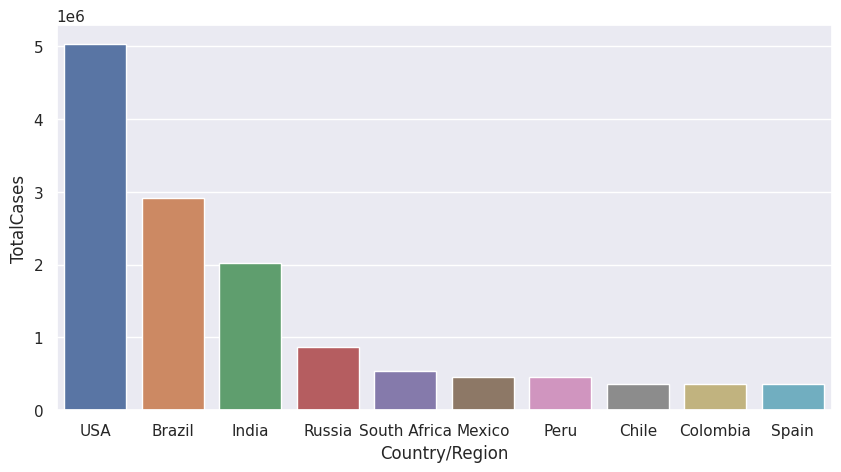

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x="Country/Region",y="TotalCases",data=confirm_case_countries)

**TOP 10 COUNTRIES HAVING HIGHEST COVID TOTAL CASES DATA **
USA , BRAZIL , INDIA HAS TOP COVID CASES


<Axes: xlabel='Country/Region', ylabel='TotalDeaths'>

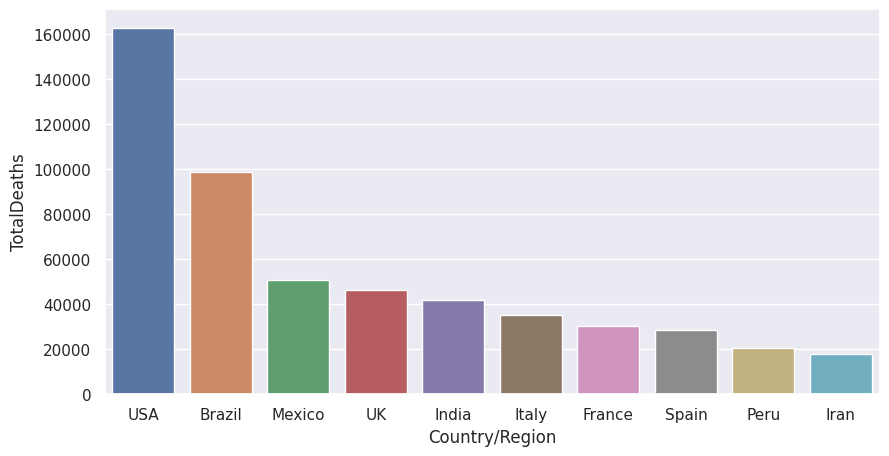

In [ ]:
# now calculate top 10 countries having death cases
Death_case_countries=df.groupby(['Country/Region'], as_index=False)['TotalDeaths'].sum().sort_values(by=['TotalDeaths'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x="Country/Region",y="TotalDeaths",data=Death_case_countries)

**TOP 10 COUNTRIES HAVING HIGHEST DEATH RATE**
USA, BRAZIL AND MEXICO ARE IN TOP 3

<Axes: xlabel='Country/Region', ylabel='TotalRecovered'>

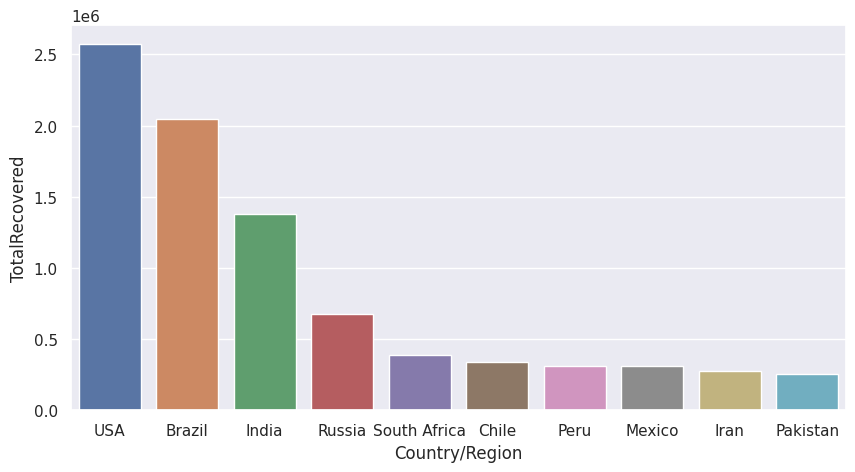

In [ ]:
#NOW TO CALCULATE TOTAL RECOVERD CASE
recover_case_countries=df.groupby(['Country/Region'], as_index=False)['TotalRecovered'].sum().sort_values(by=['TotalRecovered'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x="Country/Region",y="TotalRecovered",data=recover_case_countries)

**TOP 10 COUNTRIES HAVING HIGHEST RECOVERED RATE USA, BRAZIL AND INDIA ARE IN TOP 3**

In [ ]:
top_3_countries_comp=df[['Country/Region','Population','TotalCases','TotalDeaths','TotalRecovered']].sort_values(by=['TotalRecovered'],ascending=False).head(3)

In [ ]:
top_3_countries_comp

,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered
0,USA,331198130,5032179,162804,2576668
1,Brazil,212710692,2917562,98644,2047660
2,India,1381344997,2025409,41638,1377384


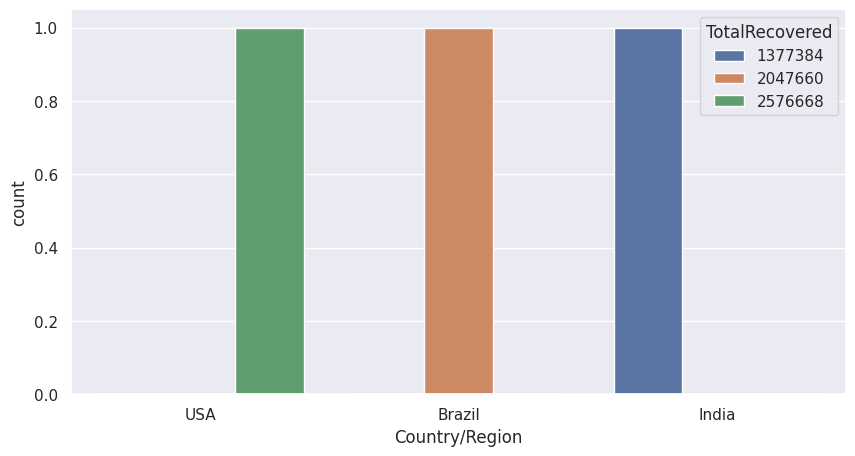

In [ ]:
ax=sns.countplot(x='Country/Region',data=top_3_countries_comp,hue='TotalRecovered')

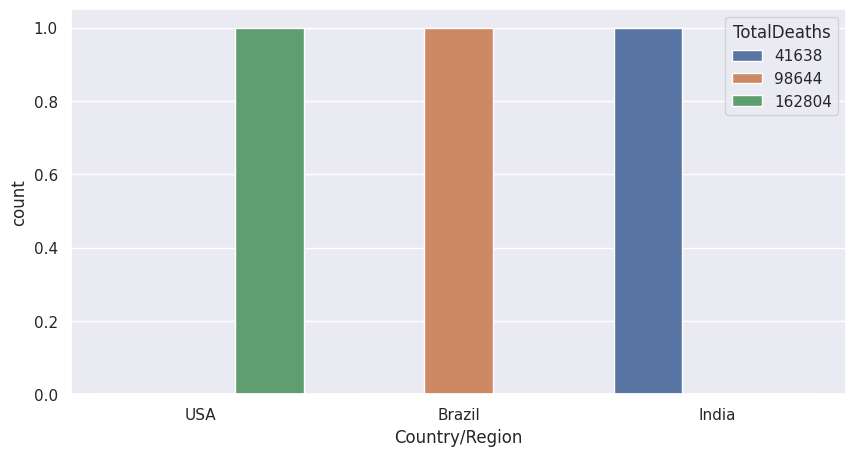

In [ ]:
ax=sns.countplot(x='Country/Region',data=top_3_countries_comp,hue='TotalDeaths')

In [ ]:
top_3_countries_comp # USA have highest  death rate India have lowest death rate


,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered
0,USA,331198130,5032179,162804,2576668
1,Brazil,212710692,2917562,98644,2047660
2,India,1381344997,2025409,41638,1377384


Text(0.5, 1.0, 'Total case vs total Death')

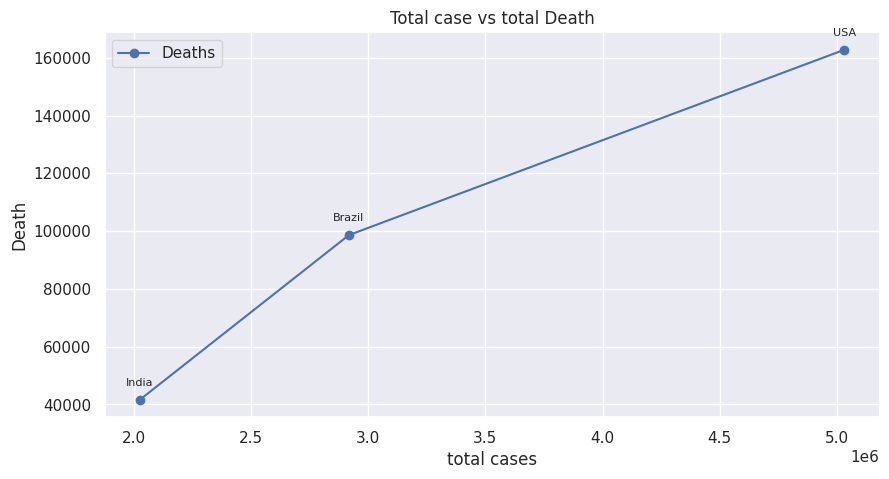

In [ ]:

plt.plot(top_3_countries_comp.TotalCases,top_3_countries_comp.TotalDeaths,marker='o',label="Deaths")
plt.xlabel("total cases")
plt.ylabel('Death')
plt.legend()
for i, row in top_3_countries_comp.iterrows():
    plt.annotate(row['Country/Region'], (row['TotalCases'], row['TotalDeaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.title('Total case vs total Death')


Text(0.5, 1.0, 'Total case vs total recovered')

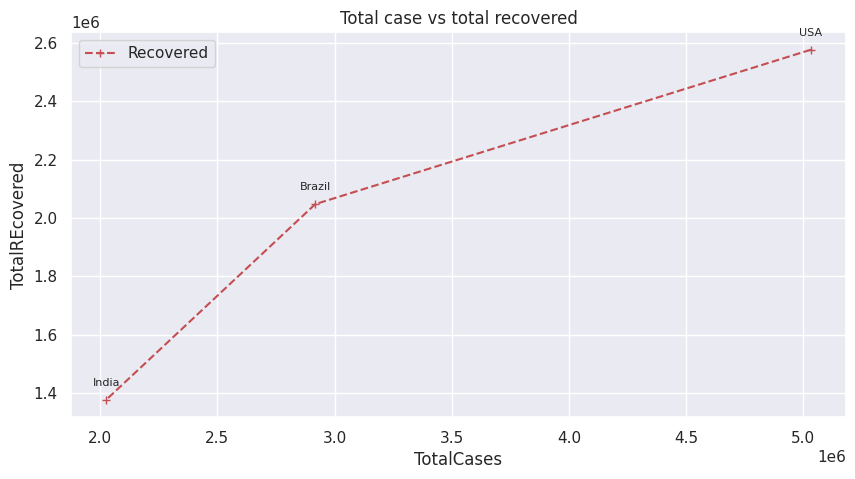

In [ ]:
plt.plot(top_3_countries_comp.TotalCases,top_3_countries_comp.TotalRecovered,marker='+',ls="--",label="Recovered",color="r")
plt.xlabel("TotalCases")
plt.ylabel("TotalREcovered")
plt.legend()
for i, row in top_3_countries_comp.iterrows():
    plt.annotate(row['Country/Region'], (row['TotalCases'], row['TotalRecovered']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.title('Total case vs total recovered')





**USA, BRAZIL AND INDIA HAS HIGHEST TOTAL CASES**
**USA , BRAZIL AND MEXICO HAS HIGHEST TOTAL DEATHS CASES**
**USA , BRAZIL AND INDIA HAS HIGHEST TOTAL RECOVERED CASES**


